In [1]:
import pandas as pd
import numpy as np

In [2]:
df_l1= pd.read_csv('/kaggle/input/english/train_en_l1.csv', engine = 'python')
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


In [3]:
annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5','en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [4]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN,1


In [5]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df = df.dropna(subset=['label_1'])
df['label_1'] = df['label_1'].astype(int)


# Preview
print(df.head())
print(df.shape)

                                                text  label_1
0      This is our history . For Shia and Sunni ,...        0
1     If this is "grilling" then wht wud u call t...        1
2    look at <handle replaced>madam. Locals attac...        0
3    our beloved yogi ji has given money home and...        1
4  "I gonna kill that bitch"  Bitvj imma kill you...        1
(6531, 2)


In [6]:
df

,text,label_1
0,"This is our history . For Shia and Sunni ,...",0
1,"If this is ""grilling"" then wht wud u call t...",1
2,look at <handle replaced>madam. Locals attac...,0
3,our beloved yogi ji has given money home and...,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1
...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1


In [7]:
import nltk
import string
import re

## Function to normalize text for pre-processing ##
def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text

In [8]:
df['text'] = df['text'].apply(lambda x: normalize_text(x))
df

,text,label_1
0,this is our history for shia and sunni ...,0
1,if this is grilling then wht wud u call t...,1
2,look at madam locals attacked no religion...,0
3,our beloved yogi ji has given money home and...,1
4,i gonna kill that bitch bitvj imma kill you...,1
...,...,...
6526,“mama let’s research” bitch suck my dick,0
6527,i was by myself and it was her and her bitch ...,0
6528,i just seen a comment and bitch im cryinnnnnn...,0
6529,boys only luxury ...,1


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import matplotlib.pyplot as plt

# Load data
X_texts = list(df['text'])
y = df['label_1'].values
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-04-13 16:44:13.374519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744562653.571169      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744562653.624421      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:

max_features = 10000
max_len = 100
embed_size = 300

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_texts)
X_sequences = tokenizer.texts_to_sequences(X_texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')
X_padded = np.array(X_padded)

# One-hot encode the labels
y_cat = np.eye(2)[y]
y_cat
X_padded

array([[  12,    6,   68, ...,    0,    0,    0],
       [  34,   12,    6, ...,    0,    0,    0],
       [ 159,   64,  240, ...,    0,    0,    0],
       ...,
       [  10,   42,  385, ...,    0,    0,    0],
       [1157,   69, 4059, ...,    0,    0,    0],
       [6079,  293,   27, ...,    0,    0,    0]], dtype=int32)

In [12]:
# Load HurtLex Hindi
hurtlex_df = pd.read_csv('/kaggle/input/english/hurtlex_EN.tsv', sep='\t', engine='python', on_bad_lines='skip')


# Build category dictionary
hurtlex_dict = {}
for _, row in hurtlex_df.iterrows():
    word = str(row['lemma']).strip()
    category = str(row['category']).strip()
    if word not in hurtlex_dict:
        hurtlex_dict[word] = set()
    hurtlex_dict[word].add(category)

# Create category index
all_categories = sorted({cat for cats in hurtlex_dict.values() for cat in cats})
cat2idx = {cat: idx for idx, cat in enumerate(all_categories)}
num_cats = len(all_categories)

# Convert each text to HurtLex category vector
def get_hurtlex_vector(text):
    vec = np.zeros(num_cats)
    for token in text.split():
        if token in hurtlex_dict:
            for cat in hurtlex_dict[token]:
                vec[cat2idx[cat]] = 1
    return vec

hurtlex_features = np.array([get_hurtlex_vector(text) for text in df['text']])


In [13]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip -d glove
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")


--2025-04-13 16:45:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-13 16:45:19--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-13 16:45:20--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov


Fold 1
Epoch 1 - Train Acc: 0.7942, Val Acc: 0.7857
Epoch 2 - Train Acc: 0.7930, Val Acc: 0.7939
Epoch 3 - Train Acc: 0.7914, Val Acc: 0.7860
Epoch 4 - Train Acc: 0.7930, Val Acc: 0.7909
Epoch 5 - Train Acc: 0.8000, Val Acc: 0.7808
Epoch 6 - Train Acc: 0.8046, Val Acc: 0.7949
Epoch 7 - Train Acc: 0.8058, Val Acc: 0.7875
Epoch 8 - Train Acc: 0.8006, Val Acc: 0.7918
Epoch 9 - Train Acc: 0.8074, Val Acc: 0.7958
Epoch 10 - Train Acc: 0.8080, Val Acc: 0.7835
Epoch 11 - Train Acc: 0.8172, Val Acc: 0.7939
Epoch 12 - Train Acc: 0.8257, Val Acc: 0.7961
Epoch 13 - Train Acc: 0.8199, Val Acc: 0.7955
Epoch 14 - Train Acc: 0.8312, Val Acc: 0.7964
Epoch 15 - Train Acc: 0.8331, Val Acc: 0.7805
Fold 1 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.86      0.86      0.86      2566
    Not Hate       0.49      0.50      0.49       700

    accuracy                           0.78      3266
   macro avg       0.68      0.68      0.68      3266
weighte

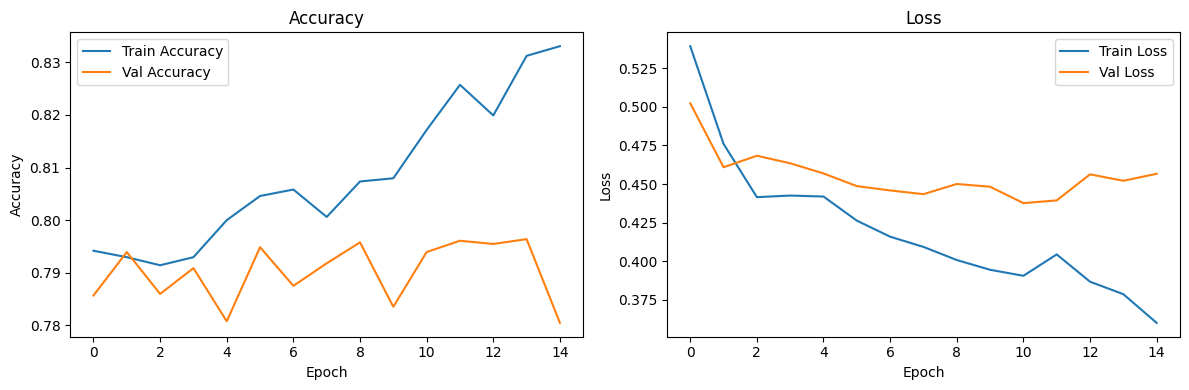


Fold 2
Epoch 1 - Train Acc: 0.7774, Val Acc: 0.7942
Epoch 2 - Train Acc: 0.7875, Val Acc: 0.8018
Epoch 3 - Train Acc: 0.7949, Val Acc: 0.7948
Epoch 4 - Train Acc: 0.7811, Val Acc: 0.7957
Epoch 5 - Train Acc: 0.7988, Val Acc: 0.7985
Epoch 6 - Train Acc: 0.7982, Val Acc: 0.7969
Epoch 7 - Train Acc: 0.7964, Val Acc: 0.7979
Epoch 8 - Train Acc: 0.8013, Val Acc: 0.8028
Epoch 9 - Train Acc: 0.8105, Val Acc: 0.8018
Epoch 10 - Train Acc: 0.8056, Val Acc: 0.8046
Epoch 11 - Train Acc: 0.8141, Val Acc: 0.8025
Epoch 12 - Train Acc: 0.8197, Val Acc: 0.7877
Epoch 13 - Train Acc: 0.8141, Val Acc: 0.7920
Epoch 14 - Train Acc: 0.8249, Val Acc: 0.8037
Epoch 15 - Train Acc: 0.8236, Val Acc: 0.7975
Fold 2 - Classification Report:
              precision    recall  f1-score   support

        Hate       0.86      0.89      0.87      2593
    Not Hate       0.51      0.45      0.48       672

    accuracy                           0.80      3265
   macro avg       0.69      0.67      0.68      3265
weighte

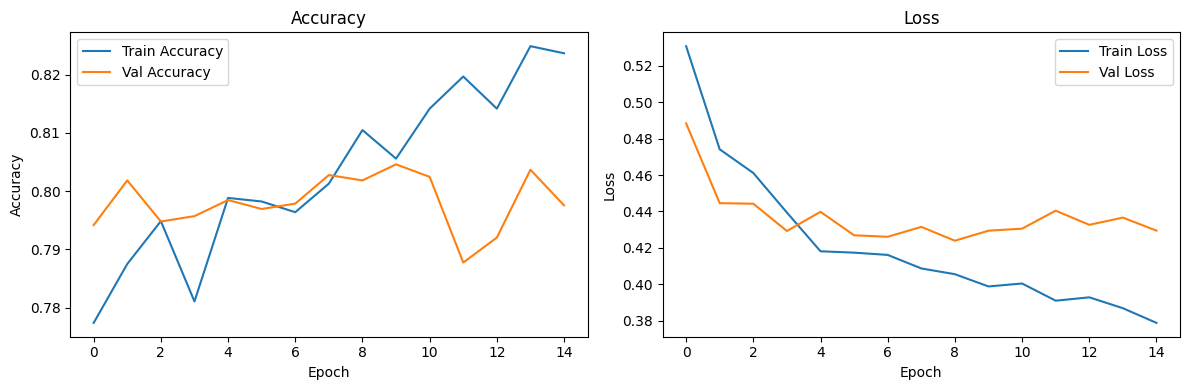


Average Results Across 2 Folds:
Precision: 0.79
Recall: 0.79
F1 Score: 0.79


In [27]:

# Load GloVe
embeddings_index = {}
with open('/kaggle/working/glove/glove.6B.300d.txt', encoding="utf8") as f:    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs



vocab_size = len(tokenizer.word_index) + 1  ## total distinct words is the Vocabulary ##
word_index = tokenizer.word_index
num_words = min(max_features,len(word_index)+1)


# Create embedding matrix
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
for word, i in tokenizer.word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# Dataset
# class TextDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = torch.LongTensor(X)
#         self.y = torch.FloatTensor(y)

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]


class DualInputDataset(Dataset):
    def __init__(self, X_seq, hurtlex_feats, y):
        self.X_seq = torch.LongTensor(X_seq)
        self.hurtlex_feats = torch.FloatTensor(hurtlex_feats)
        self.y = torch.FloatTensor(y)

    def __len__(self):
        return len(self.X_seq)

    def __getitem__(self, idx):
        return self.X_seq[idx], self.hurtlex_feats[idx], self.y[idx]


# Model
# class LSTMClassifier(nn.Module):
#     def __init__(self, embedding_matrix):
#         super(LSTMClassifier, self).__init__()
#         vocab_size, embed_size = embedding_matrix.shape
#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
#         self.embedding.weight.requires_grad = False
#         self.dropout1 = nn.Dropout(0.2)
#         self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
#         self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
#         self.avgpool = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(256, 128)
#         self.dropout2 = nn.Dropout(0.2)
#         self.out = nn.Linear(128, 2)

#     def forward(self, x):
#         x = self.embedding(x)
#         x = self.dropout1(x)
#         x = x.permute(0, 2, 1)
#         x = self.conv1(x)
#         x = x.permute(0, 2, 1)
#         x, _ = self.lstm(x)
#         x = x.permute(0, 2, 1)
#         x = self.avgpool(x).squeeze(2)
#         x = torch.relu(self.fc(x))
#         x = self.dropout2(x)
#         return self.out(x)

class DualBranchClassifier(nn.Module):
    def __init__(self, embedding_matrix, hurtlex_input_dim):
        super(DualBranchClassifier, self).__init__()
        vocab_size, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False

        self.dropout1 = nn.Dropout(0.2)
        self.conv1 = nn.Conv1d(embed_size, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, 128, batch_first=True, bidirectional=True)
        self.avgpool = nn.AdaptiveAvgPool1d(1)

        self.hurtlex_fc = nn.Sequential(
            nn.Linear(hurtlex_input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.fusion = nn.Sequential(
            nn.Linear(256 + 64, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 2)
        )

    def forward(self, x_seq, x_hurtlex):
        x = self.embedding(x_seq)
        x = self.dropout1(x)
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x.permute(0, 2, 1)
        x = self.avgpool(x).squeeze(2)

        hurtlex_feat = self.hurtlex_fc(x_hurtlex)
        combined = torch.cat((x, hurtlex_feat), dim=1)
        return self.fusion(combined)


# Training and Evaluation
kf = KFold(n_splits=2, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_padded)):
    print(f"\nFold {fold+1}")
    # train_dataset = TextDataset(X_padded[train_idx], y_cat[train_idx])
    # val_dataset = TextDataset(X_padded[val_idx], y_cat[val_idx])
    train_dataset = DualInputDataset(X_padded[train_idx], hurtlex_features[train_idx], y_cat[train_idx])
    val_dataset = DualInputDataset(X_padded[val_idx], hurtlex_features[val_idx], y_cat[val_idx])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)

    optimizer = optim.Adam(model.parameters(), lr=0.0005)
    criterion = nn.CrossEntropyLoss()

    train_acc_hist, val_acc_hist, train_loss_hist, val_loss_hist = [], [], [], []
    best_val_f1 = 0.0
    best_model_path = f"model{fold+1}.pt"

     
    for epoch in range(15):
        model.train()
        total_loss, correct = 0, 0
        for x_seq, x_hurtlex, labels in train_loader:
            x_seq, x_hurtlex, labels = x_seq.to(device), x_hurtlex.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x_seq, x_hurtlex)
            loss = criterion(outputs, torch.argmax(labels, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            correct += (preds == torch.argmax(labels, dim=1)).sum().item()

        train_acc = correct / len(train_loader.dataset)
        train_acc_hist.append(train_acc)
        train_loss_hist.append(total_loss / len(train_loader))

        model.eval()
        val_loss, correct = 0, 0
        y_preds, y_true = [], []
        with torch.no_grad():
            for x_seq, x_hurtlex, labels in val_loader:
                x_seq, x_hurtlex, labels = x_seq.to(device), x_hurtlex.to(device), labels.to(device)
                outputs = model(x_seq, x_hurtlex)
                loss = criterion(outputs, torch.argmax(labels, dim=1))
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                correct += (preds == torch.argmax(labels, dim=1)).sum().item()
                y_preds.extend(preds.cpu().numpy())
                y_true.extend(torch.argmax(labels, axis=1).cpu().numpy())

        val_acc = correct / len(val_loader.dataset)
        val_acc_hist.append(val_acc)
        val_loss_hist.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        

    # Metrics
    report = classification_report(y_true, y_preds, target_names=['Hate', 'Not Hate'], output_dict=True)
    precision_list.append(report['weighted avg']['precision'])
    recall_list.append(report['weighted avg']['recall'])
    f1_list.append(report['weighted avg']['f1-score'])
    val_f1 = report['weighted avg']['f1-score']

    
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), best_model_path)
    print(f'Fold {fold + 1} - Classification Report:\n{classification_report(y_true, y_preds, target_names=["Hate", "Not Hate"])}\n')

    # Plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_hist, label="Train Accuracy")
    plt.plot(val_acc_hist, label="Val Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_hist, label="Train Loss")
    plt.plot(val_loss_hist, label="Val Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Final Results
print("\nAverage Results Across 2 Folds:")
print(f"Precision: {np.mean(precision_list):.2f}")
print(f"Recall: {np.mean(recall_list):.2f}")
print(f"F1 Score: {np.mean(f1_list):.2f}")


In [28]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Assuming you have `y_val_labels` and `y_pred_labels` as the true and predicted labels

# Compute F1 score, precision, and recall
f1 = f1_score(y_true, y_preds, average='weighted')
precision = precision_score(y_true, y_preds, average='weighted')
recall = recall_score(y_true, y_preds, average='weighted')

print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(report)


F1 Score: 0.7927470592272955
Precision: 0.7890266726694998
Recall: 0.7975497702909647
{'Hate': {'precision': 0.8615269461077845, 'recall': 0.8877747782491323, 'f1-score': 0.8744539411206079, 'support': 2593}, 'Not Hate': {'precision': 0.5092748735244519, 'recall': 0.4494047619047619, 'f1-score': 0.4774703557312253, 'support': 672}, 'accuracy': 0.7975497702909647, 'macro avg': {'precision': 0.6854009098161182, 'recall': 0.6685897700769471, 'f1-score': 0.6759621484259166, 'support': 3265}, 'weighted avg': {'precision': 0.7890266726694998, 'recall': 0.7975497702909647, 'f1-score': 0.7927470592272955, 'support': 3265}}


In [18]:
vv = pd.read_csv('/kaggle/input/english/test_en_l1.csv', on_bad_lines='skip', engine='python')


In [19]:
import string
def normalize_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text
## Apply the written function ##
vv['text'] = vv['text'].apply(lambda x: normalize_text(x))
processed_list = []
for j in vv['text']:
    process = j.replace('...','')
    processed_list.append(process)

vv = pd.DataFrame(processed_list)
vv.columns = ['text']
vv.head(n=5)


,text
0,who s this tweet about bitch it s about you ...
1,alkalamba should’ve used her slippers to slap...
2,coronavillains covididiot is a do...
3,acts like the female governors of stat...
4,let us celebrate “secular” as a beautiful w...


In [33]:
# model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)

# model.load_state_dict(torch.load('/kaggle/working/model2.pt', map_location=device))
# model.eval()

# # 5. Preprocess input text
# sequence = tokenizer.texts_to_sequences(vv['text'])  # same tokenizer used in training
# sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
# input_tensor = torch.tensor(sequence).long().to(device)

# # 6. Make predictions
# with torch.no_grad():
#     outputs = model(input_tensor)
#     predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# # 7. Save predictions to CSV
# ids = np.arange(1, len(predictions) + 1)
# result_df = pd.DataFrame({'id': ids, 'value': predictions})
# result_df.to_csv('/kaggle/working/Task1_output_hindi.csv', index=False)

# print(result_df.head())

# 1. Load the dual-branch model (text + HurtLex)
model = DualBranchClassifier(embedding_matrix, hurtlex_input_dim=num_cats).to(device)
model.load_state_dict(torch.load('/kaggle/working/model1.pt', map_location=device))
model.eval()

# 2. Preprocess input text
sequence = tokenizer.texts_to_sequences(vv['text'])  # same tokenizer used in training
sequence = pad_sequences(sequence, padding='post', maxlen=max_len)
input_tensor = torch.tensor(sequence).long().to(device)

# 3. Generate HurtLex feature vectors for test samples
test_hurtlex_feats = np.array([get_hurtlex_vector(text) for text in vv['text']])
hurtlex_tensor = torch.tensor(test_hurtlex_feats).float().to(device)

# 4. Make predictions
with torch.no_grad():
    outputs = model(input_tensor, hurtlex_tensor)
    predictions = torch.argmax(outputs, dim=1).cpu().numpy()

# 5. Save predictions to CSV
ids = np.arange(1, len(predictions) + 1)
result_df = pd.DataFrame({'id': ids, 'value': predictions})
result_df.to_csv('/kaggle/working/Task1_output_hindi.csv', index=False)

# 6. Preview output
print(result_df.head())


   id  value
0   1      1
1   2      1
2   3      0
3   4      1
4   5      0


/tmp/ipykernel_31/3335775979.py:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/model1.pt', map_location=device))


In [40]:
result_df

,id,value
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
1512,1513,0
1513,1514,0
1514,1515,0
1515,1516,0


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

# Load and compute label_1
true_df = pd.read_csv('/kaggle/input/english/test_en_l1.csv', on_bad_lines='skip', engine='python')

annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5','en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            continue
    if not valid_votes:
        return None
    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)
    return 1 if ones >= zeros else 0

# Apply majority vote
true_df['label_1'] = true_df[annotation_cols].apply(get_majority_label, axis=1)

# Drop rows with NaN labels and reset index
true_df = true_df.dropna(subset=['label_1']).reset_index(drop=True)
true_labels = true_df['label_1'].astype(int).values

# Truncate predictions to match (in case there's 1 extra)
predictions = predictions[:len(true_labels)]

# Metrics
f1 = f1_score(true_labels, predictions, average='weighted')
precision = precision_score(true_labels, predictions, average='weighted')
recall = recall_score(true_labels, predictions, average='weighted')
accuracy = accuracy_score(true_labels, predictions)

print("\nEvaluation on Test Set:")
print(f"F1 Score:      {f1:.4f}")
print(f"Precision:     {precision:.4f}")
print(f"Recall:        {recall:.4f}")
print(f"Accuracy:      {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Hate", "Not Hate"]))



🔍 Evaluation on Test Set:
F1 Score:      0.7911
Precision:     0.7918
Recall:        0.7904
Accuracy:      0.7904

Classification Report:
              precision    recall  f1-score   support

        Hate       0.87      0.87      0.87       877
    Not Hate       0.50      0.50      0.50       230

    accuracy                           0.79      1107
   macro avg       0.68      0.68      0.68      1107
weighted avg       0.79      0.79      0.79      1107

